In [39]:
#import warnings
#warnings.filterwarnings('always')
#warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [216]:
#Read dataset
wine = pd.read_csv('winequality-red.csv', sep=';')
wine.shape

(1599, 12)

In [104]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [90]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [208]:
#separate data to two categories: 
#low quality :1,2,3,4,5
#high quality: 6,7,8,9, 10

bins = (1,5,10)
group_names = [1,2]
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine.shape

(1599, 12)

In [87]:
wine['quality'].value_counts()

2    855
1    744
Name: quality, dtype: int64

In [131]:
#sns.pairplot(wine, size = 2.5)

C:\Users\49163\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\49163\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\49163\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

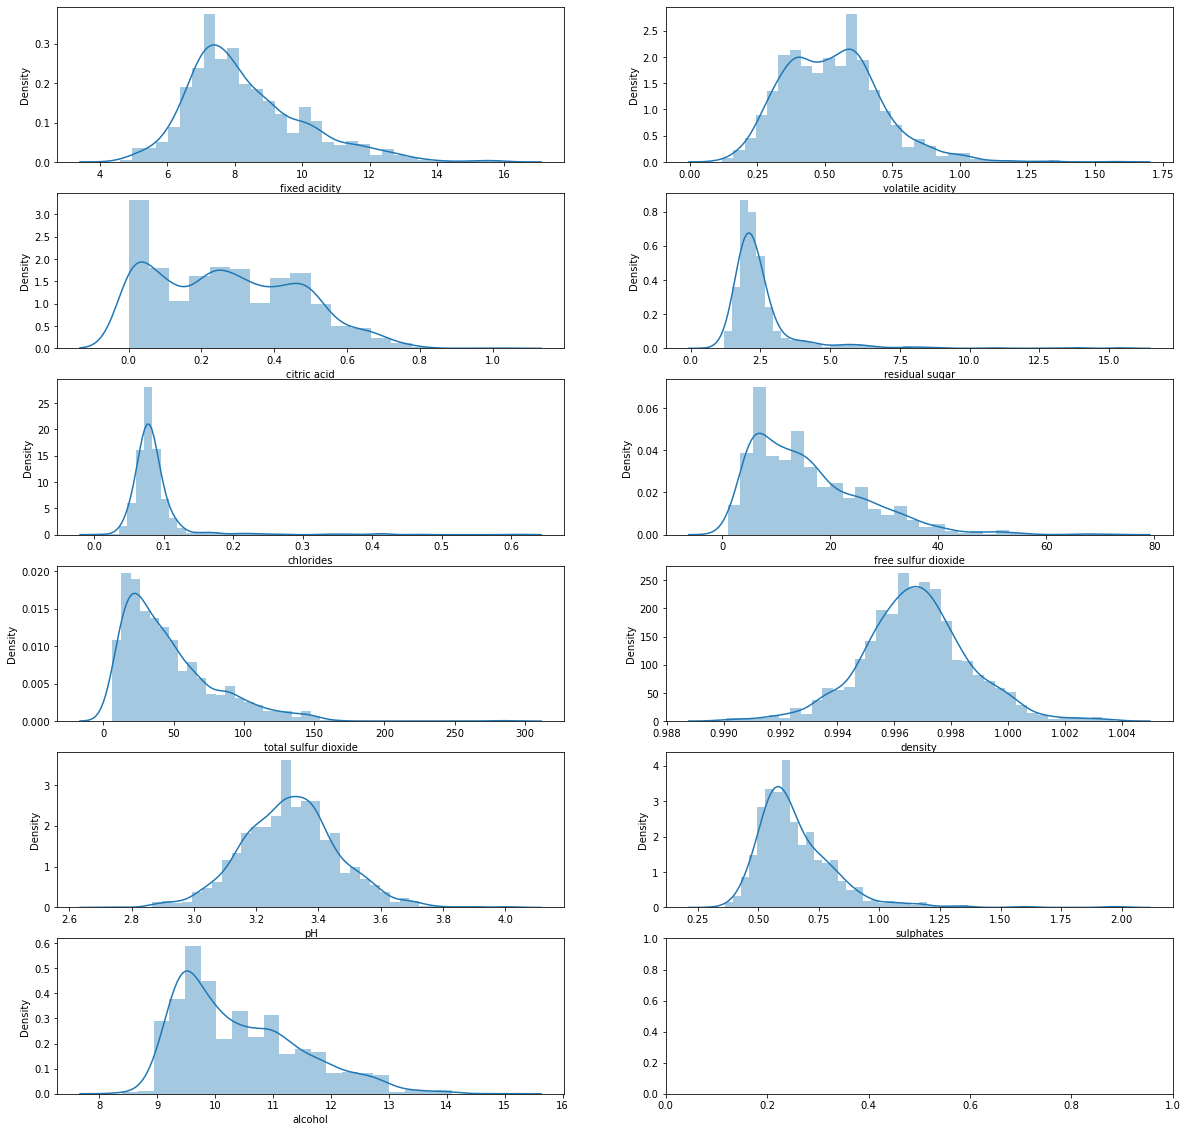

In [137]:
#Distribution of features
f, ax = plt.subplots(6,2, figsize=(20,20))
sns.distplot(wine["fixed acidity"], ax=ax[0,0])
sns.distplot(wine["volatile acidity"], ax=ax[0,1])
sns.distplot(wine["citric acid"], ax=ax[1,0])
sns.distplot(wine["residual sugar"], ax=ax[1,1])
sns.distplot(wine["chlorides"], ax=ax[2,0])
sns.distplot(wine["free sulfur dioxide"], ax=ax[2,1])
sns.distplot(wine["total sulfur dioxide"], ax=ax[3,0])
sns.distplot(wine["density"], ax=ax[3,1])
sns.distplot(wine["pH"], ax=ax[4,0])
sns.distplot(wine["sulphates"], ax=ax[4,1])
sns.distplot(wine["alcohol"], ax=ax[5,0])


In [ ]:
#The distribution of Fixed Acidity is positively skewed
#The distribution of Residual Sugar is  positively skewed with high peaks 
#  at around 2.3 with many outliers present at the higher ranges.
#The distribution of Volatile acidity looks like Bimodal with two peaks around 0.4 and 0.6.
#Sulfur dioxides with long tailed patterns
#Density has normal distribution

<AxesSubplot:>

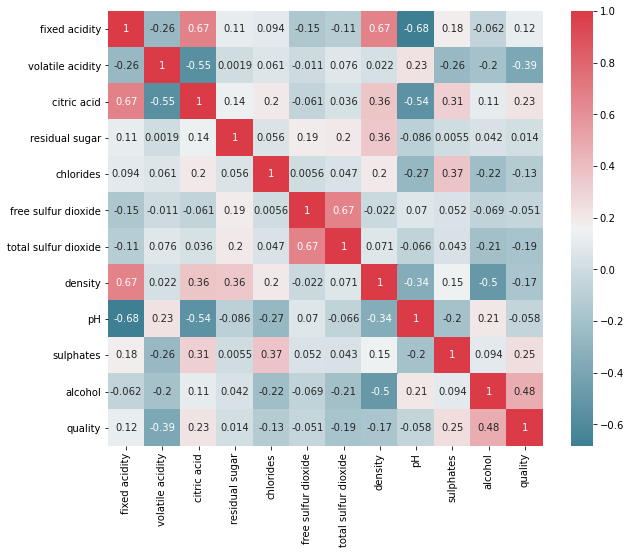

In [135]:
#Correlation between features

f, ax = plt.subplots(figsize=(10, 8))
corr = wine.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True,
            square=True, ax=ax)

C:\Users\49163\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\49163\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\49163\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

[Text(0.5, 0, 'quality'), Text(0, 0.5, 'free sulfur dioxide')]

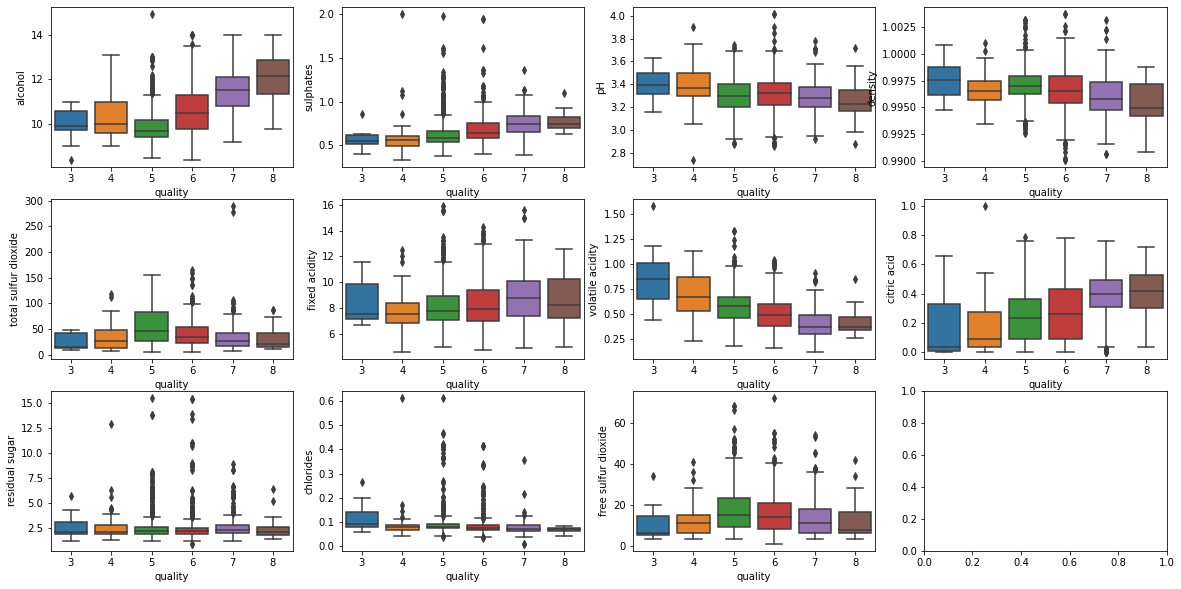

In [169]:
# checking the variation of fixed acidity in the different qualities of wine

#plt.bar(wine['quality'], wine['alcohol'], color = 'maroon')
#plt.title('relation of alcohol with wine')
#plt.xlabel('quality')
#plt.ylabel('alcohol')
#plt.show()

#Detecting outliers
f, ax = plt.subplots(3,4, figsize=(20,10))
sns.boxplot('quality','alcohol',data=wine, ax=ax[0,0]).set(xlabel='quality',ylabel='alcohol')
sns.boxplot('quality','sulphates',data=wine, ax=ax[0,1]).set(xlabel='quality',ylabel='sulphates')
sns.boxplot('quality','pH',data=wine, ax=ax[0,2]).set(xlabel='quality',ylabel='pH')
sns.boxplot('quality','density',data=wine, ax=ax[0,3]).set(xlabel='quality',ylabel='density')
sns.boxplot('quality','total sulfur dioxide',data=wine, ax=ax[1,0]).set(xlabel='quality',ylabel='total sulfur dioxide')
sns.boxplot('quality','fixed acidity',data=wine, ax=ax[1,1]).set(xlabel='quality',ylabel='fixed acidity')
sns.boxplot('quality','volatile acidity',data=wine, ax=ax[1,2]).set(xlabel='quality',ylabel='volatile acidity')
sns.boxplot('quality','citric acid',data=wine, ax=ax[1,3]).set(xlabel='quality',ylabel='citric acid')
sns.boxplot('quality','residual sugar',data=wine, ax=ax[2,0]).set(xlabel='quality',ylabel='residual sugar')
sns.boxplot('quality','chlorides',data=wine, ax=ax[2,1]).set(xlabel='quality',ylabel='chlorides')
sns.boxplot('quality','free sulfur dioxide',data=wine, ax=ax[2,2]).set(xlabel='quality',ylabel='free sulfur dioxide')

#plt.figure(figsize=(32,22))
#plt.suptitle('Boxplots of each feature showing outliers',fontsize=24)
#for i in range(1,wine.shape[1]+1):
#    plt.subplot(2,6,i)
#    plt.boxplot(wine.iloc[:,i-1])
#    plt.title(wine.columns[i-1],fontsize=18)

In [202]:
#Removing Outliers
#from scipy.stats import zscore
#z=np.abs(zscore(wine))
#z
#threshold=3
#np.where(z>3)

#wine_new=wine[(z<3).all(axis=1)]
#wine_new.shape
#wine.shape

#collist=wine.columns.values
#ncol=12
#nrows=10

#plt.figure(figsize=(20,20))
#for i in range(0,len(collist)):
#    plt.subplot(nrows,ncol,i+1)
#    sns.distplot(wine_new[collist[i]])


#wine_new.skew()


#x=wine_new.iloc[:,:-1]
#y=wine_new.iloc[:,-1]

#removal of skew-ness using log function
#for col in x.columns:
#    if x.skew().loc[col]>0.55:
#        x[col]=np.log1p(x[col])
        
#x.skew()

#removed outliers
#X = x
#y = y

In [217]:
#X = np.array(wine.iloc[:, [5, 6]])
X = np.array(wine.iloc[:, :11])

y = np.array(wine.iloc[:, 11])

(1599,)

In [218]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [219]:
#Splitind data: Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [220]:
#Models comparisons

from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

models=[LinearSVC(),SVC(kernel = 'rbf', random_state = 0),SVC(kernel = 'poly', random_state = 0, degree = 3),SVC(kernel = 'sigmoid', random_state = 0),
        KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]

model_names=['LinearSVM','rbfSVM','polySVM','sigmoidSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']
acc=[]
d={}
for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
acc_frame=pd.DataFrame(d)

C:\Users\49163\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [221]:
acc_frame

,Modelling Algo,Accuracy
0,LinearSVM,0.6125
1,rbfSVM,0.6300
2,polySVM,0.6200
3,sigmoidSVM,0.5050
4,KNearestNeighbors,0.5750
5,RandomForestClassifier,0.6800
6,DecisionTree,0.6200
7,GradientBoostingClassifier,0.6350
8,GaussianNB,0.5450


In [225]:
#Tune Parameters SMV with GridSearch

from sklearn.model_selection import GridSearchCV, cross_val_score

model = SVC(random_state=0)

param = {
    'C': [0.1, 0.5, 0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':[ 'rbf'], #'linear',
    'gamma' :[0.01, 0.05, 0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

grid_svc = GridSearchCV(model, param_grid = param, scoring = 'accuracy', cv = 5)

best_model=grid_svc.fit(X_train, y_train)
best_model.score(X_test,y_test)

0.6575

In [227]:
grid_svc.best_params_

{'C': 1, 'gamma': 0.8, 'kernel': 'rbf'}

In [189]:
#Best parameter

import sklearn
from sklearn.metrics import classification_report, confusion_matrix

model_2 = SVC(kernel = 'rbf', gamma = 0.8, C= 1)
model_2.fit(X_train, y_train)

y_pred =model_2.predict(X_test)
train_preds = model_2.predict(X_train)


In [190]:
print("Accuracy :",metrics.accuracy_score(y_test, y_pred) * 100, "% \n")
print("Classification report : \n",metrics.classification_report(y_test, y_pred), "\n")

Accuracy : 67.76859504132231 % 

Classification report : 
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.75      0.71      0.73       149
           6       0.61      0.84      0.71       146
           7       0.86      0.37      0.51        49
           8       0.00      0.00      0.00         5

    accuracy                           0.68       363
   macro avg       0.44      0.38      0.39       363
weighted avg       0.67      0.68      0.65       363
 



C:\Users\49163\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\49163\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\49163\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
#For calssification Models
print("Training accuracy :", model_2.score(X_train, y_train))
print("Testing accuracy :", model_2.score(X_test, y_test))

Training accuracy : 0.7873227689741451
Testing accuracy : 0.7475


In [86]:
train_score = metrics.r2_score(y_train, train_preds)
test_score = metrics.r2_score(y_test, y_pred)
print('test_score:', test_score)
print('train_score:', train_score)

test_score: -0.015713387806411072
train_score: 0.14539076475849722


In [98]:
#For regression models
#mse_test=metrics.mean_squared_error(y_test, y_pred)
#print('mse:', mse_test)

In [83]:
'''
The confusion matrix is often used for classification analysis, where a C ×C matrix (C is the number of classes) is created by matching the predictedvalues (in columns) with the desired classes (in rows) 
'''
print(confusion_matrix(y_test, y_pred))
'''                              Actual
                			event			 no-event
Predicted  event		true positive		false positive
           no-event 	false negative		true negative
'''

[[130  55]
 [ 46 169]]


In [130]:

'''
#when we have only one feature:
#X = np.array(wine.iloc[:, [5, 6]])
#y = np.array(wine.iloc[:, 11])

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_pred

aranged_x0 = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_x1 = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)

X1, X2 = np.meshgrid(aranged_x0, aranged_x1)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
     alpha = 0.15, cmap = ListedColormap(('orange', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Linear Kernel (Test set)')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()
'''

"\nfrom matplotlib.colors import ListedColormap\nX_set, y_set = X_test, y_pred\n\naranged_x0 = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)\naranged_x1 = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)\n\nX1, X2 = np.meshgrid(aranged_x0, aranged_x1)\nplt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),\n     alpha = 0.15, cmap = ListedColormap(('orange', 'blue')))\n\nplt.xlim(X1.min(), X1.max())\nplt.ylim(X2.min(), X2.max())\nfor i, j in enumerate(np.unique(y_set)):\n    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],\n                c = ListedColormap(('red', 'green'))(i), label = j)\nplt.title('SVM Linear Kernel (Test set)')\nplt.xlabel('x0')\nplt.ylabel('x1')\nplt.legend()\nplt.show()\n"